In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
data_load = pd.read_excel(r"C:\Users\86177\Desktop\tank\2011-2019tank_data.xlsx")
data_load.head()

,发生时间,日期,地点,区/市,路段,经度,纬度,路段分类,罐内介质,事故原因,事故类型,死亡,受伤,伤亡人数
0,03:00:00,2019 11.09,江苏,扬州市,扬州沿江公路李典镇友谊路,119.696,32.353717,城市道路段,石灰粉,槽罐车司机开着开着竟然睡着了，失去控制的槽罐车冲出马路骑上了一根自来水主管道，导致管道破损，...,侧翻,0,1,1
1,12:00:00,2019 10.10,江苏,泰州市,泰州市高港区永安洲镇高港大道,119.92,32.264176,城市道路段,醋酸乙酯,的方向不受控制，往右倾斜，使劲踩刹车没有反应，撞向路边发生侧翻、罐体有破损点，醋酸乙酯少量泄漏,冲破护栏、侧翻、泄漏,0,0,0
2,17:40:00,2019 10.10,江苏,海安市,启扬高速某路段,120.6,32.481962,高速路段,丙烯腈,槽罐车在拐弯的时候侧翻事故,侧翻,0,0,0
3,13:40:00,2019 9.10,江苏,淮安市,长深高速淮安大桥,119.029,33.679979,桥梁路段,柴油,由于前方有辆大货车急刹车，他来不及刹车，打了一把方向，车辆才发生侧翻。,侧翻，泄漏,1,0,1
4,13:00:00,2019 9.07,上海,崇明区,利民路陈海公路路口,121.398,31.672964,道路交叉口,*,槽罐车沿利民路南向北行驶，行至陈海公路右转时，与一辆电瓶车发生碰撞，骑车男子遭到撞击后，倒在...,碰撞,1,0,1


In [3]:
data_time_merge = data_load["日期"].map(str) +" " + data_load["发生时间"].map(str)
data_time = pd.to_datetime(data_time_merge)  
data_time

0     2019-11-01 03:00:00
1     2019-10-01 12:00:00
2     2019-10-01 17:40:00
3     2019-09-01 13:40:00
4     2019-09-01 13:00:00
              ...        
232   2011-08-01 00:20:00
233   2011-06-01 10:55:00
234   2011-04-01 11:30:00
235   2011-04-01 05:40:00
236   2011-02-01 04:40:00
Length: 237, dtype: datetime64[ns]

In [4]:
#将datetime 转化成为字符串，再存在列表里面
ls =[]
for t in data_time:
    ls.append(t.strftime("%Y-%m-%d %H:%M:%S")) 
ls

['2019-11-01 03:00:00',
 '2019-10-01 12:00:00',
 '2019-10-01 17:40:00',
 '2019-09-01 13:40:00',
 '2019-09-01 13:00:00',
 '2019-08-01 22:30:00',
 '2019-08-01 12:00:00',
 '2019-08-01 15:00:00',
 '2019-08-01 20:00:00',
 '2019-08-01 07:05:00',
 '2019-08-01 01:00:00',
 '2019-08-01 12:06:00',
 '2019-07-01 08:00:00',
 '2019-07-01 12:00:00',
 '2019-07-01 07:54:00',
 '2019-07-01 12:20:00',
 '2019-06-01 08:30:00',
 '2019-06-01 08:00:00',
 '2019-06-01 19:00:00',
 '2019-06-01 00:00:00',
 '2019-05-01 20:00:00',
 '2019-05-01 06:00:00',
 '2019-04-01 16:00:00',
 '2019-03-01 02:00:00',
 '2019-02-01 13:48:00',
 '2019-02-01 08:58:00',
 '2019-01-01 08:00:00',
 '2019-01-01 06:00:00',
 '2019-01-01 11:40:00',
 '2018-12-01 09:49:00',
 '2018-12-01 05:00:00',
 '2018-11-01 09:00:00',
 '2018-11-01 04:20:00',
 '2018-10-01 06:10:00',
 '2018-10-01 04:00:00',
 '2018-09-01 02:08:00',
 '2018-09-01 00:30:00',
 '2018-09-01 11:58:00',
 '2018-08-01 13:46:00',
 '2018-08-01 06:00:00',
 '2018-08-01 14:00:00',
 '2018-07-01 18:

In [5]:
count_0_2 = 0
count_2_4 = 0
count_4_6 = 0
count_6_8 = 0
count_8_10 = 0
count_10_12 = 0
count_12_14 = 0
count_14_16 = 0
count_16_18 = 0
count_18_20 = 0
count_20_22 = 0
count_22_24 = 0

for i in ls:
    s = int(i.split(" ")[1][:2])
    if  0 <= s < 2:
        count_0_2 += 1
    elif 2 <= s < 4:
        count_2_4 += 1
    elif 4 <= s < 6:
        count_4_6 += 1
    elif 6 <= s < 8:
        count_6_8 += 1
    elif 8 <= s < 10:
        count_8_10 += 1
    elif 10 <= s < 12:
        count_10_12 += 1
    elif 12 <= s < 14:
        count_12_14 += 1
    elif 14 <= s < 16:
        count_14_16 += 1
    elif 16 <= s < 18:
        count_16_18 += 1
    elif 18 <= s < 20:
        count_18_20 += 1
    elif 20 <= s < 22:
        count_20_22 += 1
    else:
        count_22_24 += 1
data_hour = [count_0_2,count_2_4,count_4_6,count_6_8,count_8_10,count_10_12,count_12_14,count_14_16,count_16_18,count_18_20,count_20_22,count_22_24]
data_hour

[16, 15, 24, 33, 34, 20, 33, 15, 14, 9, 9, 15]

In [6]:
ls_hour = ["0:00-2:00","2:00-4:00","4:00-6:00","6:00-8:00","8:00-10:00","10:00-12:00",
           "12:00-14:00","14:00-16:00","16:00-18:00","18:00-20:00","20:00-22:00","22:00-24:00"]
ts_data_hour = pd.Series(data_hour,index = ls_hour)
ts_data_hour

0:00-2:00      16
2:00-4:00      15
4:00-6:00      24
6:00-8:00      33
8:00-10:00     34
10:00-12:00    20
12:00-14:00    33
14:00-16:00    15
16:00-18:00    14
18:00-20:00     9
20:00-22:00     9
22:00-24:00    15
dtype: int64

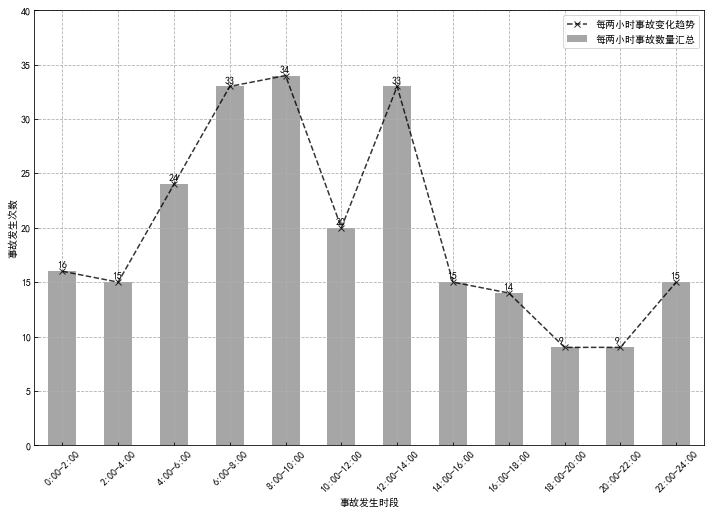

In [7]:
#绘制时刻时间序列图

ts_data_hour.plot(kind = "line",
                  linestyle = "--",
                  color = "k",
                  alpha = 0.8,
                  marker = "x",
                  label="每两小时事故变化趋势"
)
ts_data_hour.plot(kind = "bar", 
                 rot = 45,
                 color = "gray",
                  grid = True,
                  alpha = 0.7,
                  ylim = [0,40],
                  label = "每两小时事故数量汇总",
                 figsize = (12,8))
plt.xlabel("事故发生时段")
plt.ylabel("事故发生次数")
plt.legend()
plt.margins(0.15)
for i, j in zip(range(12), ts_data_hour.values):
    plt.text(i-0.1,j+0.3,"%.0f" %j,fontsize = 10)
    
plt.savefig(r"C:\Users\86177\Desktop\tank\time_series\ts_by_hour.png",dpi=400)

In [8]:
#绘制按照月进行事故数量的汇总
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
count_7 = 0
count_8 = 0
count_9 = 0
count_10 = 0
count_11 = 0
count_12 = 0

for i in ls:
    s = int(i.split(" ")[0][5:7])
    if   s == 1:
        count_1 += 1
    elif s == 2:
        count_2 += 1
    elif s == 3:
        count_3 += 1
    elif s == 4:
        count_4 += 1
    elif s == 5:
        count_5 += 1
    elif s == 6:
        count_6 += 1
    elif s == 7:
        count_7 += 1
    elif s == 8:
        count_8 += 1
    elif s == 9:
        count_9 += 1
    elif s == 10:
        count_10 += 1
    elif s == 11:
        count_11 += 1
    else:
        count_12 += 1
data_month = [count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12]
data_month

[13, 16, 16, 21, 25, 24, 22, 27, 22, 23, 12, 16]

In [9]:
ls_month = ["1月","2月","3月","4月","5月","6月",
           "7月","8月","9月","10月","11月","12月"]
ts_data_month = pd.Series(data_month,index = ls_month)
ts_data_month

1月     13
2月     16
3月     16
4月     21
5月     25
6月     24
7月     22
8月     27
9月     22
10月    23
11月    12
12月    16
dtype: int64

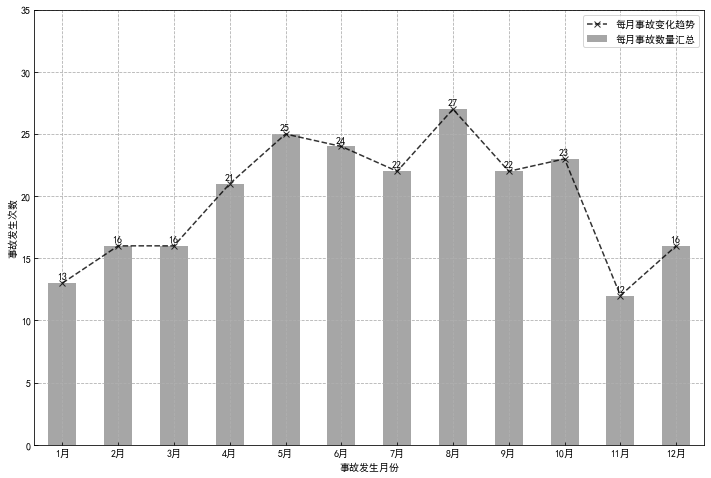

In [10]:
ts_data_month.plot(kind = "line",
                  linestyle = "--",
                  color = "k",
                  alpha = 0.8,
                  marker = "x",
                  label="每月事故变化趋势"
)
ts_data_month.plot(kind = "bar", 
                 rot = 0,
                 color = "gray",
                  grid = True,
                  alpha = 0.7,
                  ylim = [0,35],
                  label = "每月事故数量汇总",
                 figsize = (12,8))
plt.xlabel("事故发生月份")
plt.ylabel("事故发生次数")
plt.legend()
for i, j in zip(range(12), ts_data_month.values):
    plt.text(i-0.1,j+0.3,"%.0f" %j,fontsize = 10)
    
plt.savefig(r"C:\Users\86177\Desktop\tank\time_series\ts_by_month.png",dpi=400)

In [11]:
#绘制按照季度和年份进行事故数量的汇总  降采样
#按季度

ts_data_season_1 = pd.Series(1,index=data_time)
ts_data_season = ts_data_season_1.resample("Q").sum()
ts_data_season

2011-03-31     1
2011-06-30     3
2011-09-30     2
2011-12-31     4
2012-03-31     2
2012-06-30     7
2012-09-30     5
2012-12-31     4
2013-03-31     7
2013-06-30     8
2013-09-30     2
2013-12-31    10
2014-03-31     5
2014-06-30     7
2014-09-30    14
2014-12-31     4
2015-03-31     4
2015-06-30     8
2015-09-30     8
2015-12-31     4
2016-03-31     3
2016-06-30     5
2016-09-30    10
2016-12-31     8
2017-03-31     9
2017-06-30    13
2017-09-30     9
2017-12-31     8
2018-03-31     8
2018-06-30    12
2018-09-30     8
2018-12-31     6
2019-03-31     6
2019-06-30     7
2019-09-30    13
2019-12-31     3
Freq: Q-DEC, dtype: int64

In [12]:
num = len(ts_data_season.index)
value = ts_data_season.values  #按照事故数量
ls_1 =[]
ls_2 =[]
ls_3 =[]
ls_4 =[]
for i in range(int(num/4)):
    ls_1.append(value[0+4*i])
    ls_2.append(value[1+4*i])
    ls_3.append(value[2+4*i])
    ls_4.append(value[3+4*i])

data_season = pd.DataFrame({"第一季度事故次数":ls_1,
                           "第二季度事故次数":ls_2,
                           "第三季度事故次数":ls_3,
                           "第四季度事故次数":ls_4,},
                          index = range(2011,2020))
data_season

,第一季度事故次数,第二季度事故次数,第三季度事故次数,第四季度事故次数
2011,1,3,2,4
2012,2,7,5,4
2013,7,8,2,10
2014,5,7,14,4
2015,4,8,8,4
2016,3,5,10,8
2017,9,13,9,8
2018,8,12,8,6
2019,6,7,13,3


In [13]:
#年数据

ts_data_year_1 = pd.Series(1,index=data_time)
ts_data_year = ts_data_year_1.resample("Y").sum()
ts_data_year

2011-12-31    10
2012-12-31    18
2013-12-31    27
2014-12-31    30
2015-12-31    24
2016-12-31    26
2017-12-31    39
2018-12-31    34
2019-12-31    29
Freq: A-DEC, dtype: int64

In [14]:
data_season["年事故总数"] = ts_data_year.values
data_season

,第一季度事故次数,第二季度事故次数,第三季度事故次数,第四季度事故次数,年事故总数
2011,1,3,2,4,10
2012,2,7,5,4,18
2013,7,8,2,10,27
2014,5,7,14,4,30
2015,4,8,8,4,24
2016,3,5,10,8,26
2017,9,13,9,8,39
2018,8,12,8,6,34
2019,6,7,13,3,29


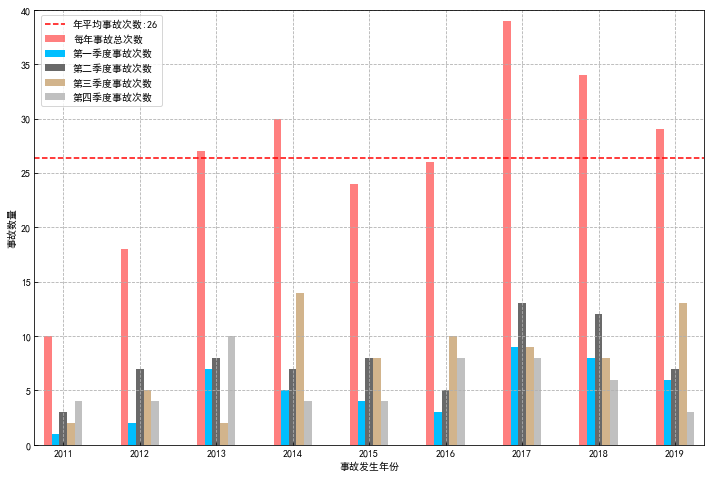

In [15]:
fig, ax1 = plt.subplots(figsize = (12, 8), facecolor='white')

x = data_season.index
y1= data_season["第一季度事故次数"].values
y2= data_season["第二季度事故次数"].values
y3= data_season["第三季度事故次数"].values
y4= data_season["第四季度事故次数"].values
y5= data_season["年事故总数"].values
plt.xlabel("事故发生年份")
plt.ylabel("事故数量")

bar_width = 0.1
#data_1.plot(kind='bar',ax = ax1,grid = True,colormap='twilight')
ax1.set_ylim([0,40])
ax1.bar(x-2*bar_width,y5,color='red',width=bar_width,label="每年事故总次数",alpha=0.5)
ax1.bar(x-bar_width,y1,color='deepskyblue',width=bar_width,label="第一季度事故次数")
ax1.bar(x,y2,color='dimgray',width=bar_width,label="第二季度事故次数")
ax1.bar(x+bar_width,y3,color='tan',width=bar_width,label="第三季度事故次数")
ax1.bar(x+2*bar_width,y4,color='silver',width=bar_width,label="第四季度事故次数")
mean = data_season["年事故总数"].sum() / len(data_season["年事故总数"])
plt.axhline(mean, label = '年平均事故次数:{:.0f}'.format(mean), color = 'r', linestyle = '--')
ax1.legend(loc=(0.01,0.78))
ax1.grid()
ax1.margins(0.015)

plt.savefig(r"C:\Users\86177\Desktop\tank\time_series\ts_by_season.png",dpi = 400)

In [16]:
data_road_classfy = data_load["路段分类"].value_counts()
data_road_classfy

高速路段     59
城市道路段    45
道路交叉口    37
国道路段     18
桥梁路段     13
隧道路段     12
乡镇公路段    12
收费站      11
省道路段     11
化工园区      8
高速服务区     7
高速匝道      4
Name: 路段分类, dtype: int64

In [17]:
#数据处理

#数据处理完毕后，重新加载数据
data_load = pd.read_excel("C:/Users/86177/Desktop/tank/2012-2019tank_data.xlsx")
data_road_classfy = data_load["路段分类"].value_counts()
data_road_classfy

高速路段     59
城市道路段    45
道路交叉口    37
国道路段     18
桥梁路段     13
隧道路段     12
乡镇公路段    12
收费站      11
省道路段     11
化工园区      8
高速服务区     7
高速匝道      4
Name: 路段分类, dtype: int64

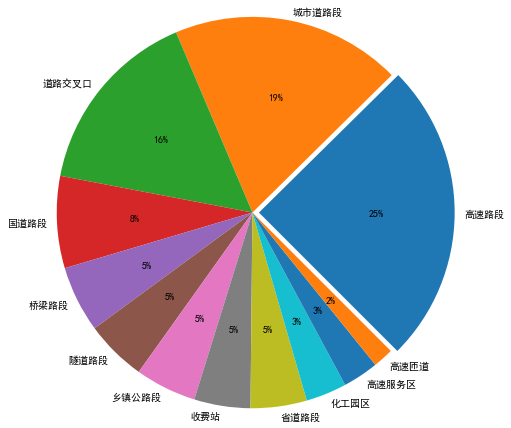

In [18]:
#绘制饼图
plt.figure(figsize = (12, 6))
plt.pie(data_road_classfy,
        explode = [0.05,0,0,0,0,0,0,0,0,0,0,0],
       labels = data_road_classfy.index,
       autopct='%.0f%%',
       pctdistance=0.6,
       labeldistance = 1.05,
       shadow = 0,
       radius=1.5,
        startangle=-45,
       frame=False,
      )
plt.savefig("C:/Users/86177/Desktop/tank/road_classfy/pie.png",dpi = 400)

In [19]:
data_load.head()

,发生时间,日期,地点,区/市,路段,经度,纬度,路段分类,罐内介质,事故原因,事故类型,死亡,受伤,伤亡人数
0,03:00:00,2019 11.09,江苏,扬州市,扬州沿江公路李典镇友谊路,119.696,32.353717,城市道路段,石灰粉,槽罐车司机开着开着竟然睡着了，失去控制的槽罐车冲出马路骑上了一根自来水主管道，导致管道破损，...,侧翻,0,1,1
1,12:00:00,2019 10.10,江苏,泰州市,泰州市高港区永安洲镇高港大道,119.92,32.264176,城市道路段,醋酸乙酯,的方向不受控制，往右倾斜，使劲踩刹车没有反应，撞向路边发生侧翻、罐体有破损点，醋酸乙酯少量泄漏,冲破护栏、侧翻、泄漏,0,0,0
2,17:40:00,2019 10.10,江苏,海安市,启扬高速某路段,120.6,32.481962,高速路段,丙烯腈,槽罐车在拐弯的时候侧翻事故,侧翻,0,0,0
3,13:40:00,2019 9.10,江苏,淮安市,长深高速淮安大桥,119.029,33.679979,桥梁路段,柴油,由于前方有辆大货车急刹车，他来不及刹车，打了一把方向，车辆才发生侧翻。,侧翻，泄漏,1,0,1
4,13:00:00,2019 9.07,上海,崇明区,利民路陈海公路路口,121.398,31.672964,道路交叉口,*,槽罐车沿利民路南向北行驶，行至陈海公路右转时，与一辆电瓶车发生碰撞，骑车男子遭到撞击后，倒在...,碰撞,1,0,1


In [20]:
data_compare = data_load.groupby("路段分类").sum()[["死亡","受伤","伤亡人数"]]
data_compare

,死亡,受伤,伤亡人数
路段分类,,,
乡镇公路段,8,9,17
化工园区,2,10,12
国道路段,6,8,14
城市道路段,26,38,64
收费站,1,11,12
桥梁路段,6,7,13
省道路段,2,2,4
道路交叉口,24,46,70
隧道路段,5,3,8


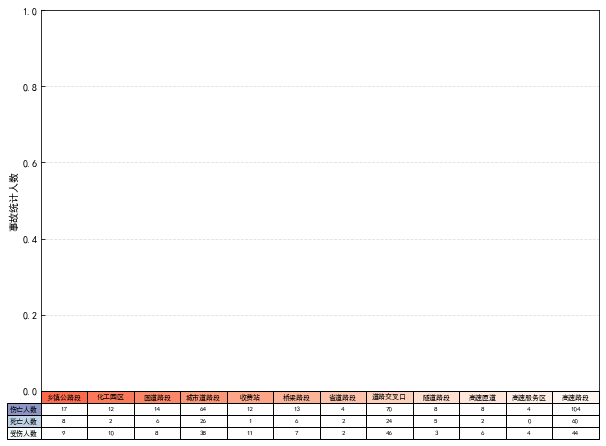

In [21]:
agg = [[ 17,  12, 14, 64, 12, 13, 4, 70, 8, 8, 4, 104],
    [8, 2,  6, 26,  1, 6, 2, 24, 5, 2, 0, 60],
        [9, 10,  8,  38, 11, 7, 2, 46, 3, 6, 4, 44],
        ]
ls = ['乡镇公路段', '化工园区', '国道路段', '城市道路段', '收费站', '桥梁路段', '省道路段', '道路交叉口',
       '隧道路段', '高速匝道', '高速服务区', '高速路段']
df = pd.DataFrame(agg,columns = ls,
                 index = ["伤亡人数","死亡人数","受伤人数"])


plt.figure(figsize=(10,7))
# 创建堆叠图
plt.table(cellText = agg,
          cellLoc='center',
          cellColours = None,
          rowLabels = ["伤亡人数","死亡人数","受伤人数"],
          rowColours = plt.cm.BuPu(np.linspace(0, 0.5,3))[::-1],  # BuPu可替换成其他colormap
          colLabels = ls,
          colColours = plt.cm.Reds(np.linspace(0, 0.5,12))[::-1], 
          rowLoc='right',
          loc='bottom',
         )

# cellText：表格文本
# cellLoc：cell内文本对齐位置
# rowLabels：行标签
# colLabels：列标签
# rowLoc：行标签对齐位置
# loc：表格位置 → left，right，top，bottom


plt.xticks([])
# 不显示x轴标注
plt.ylabel("事故统计人数")
plt.grid(linestyle = "--",alpha = 0.4)
plt.savefig(r"C:\Users\86177\Desktop\tank\road_classfy\table.png",dpi =400)

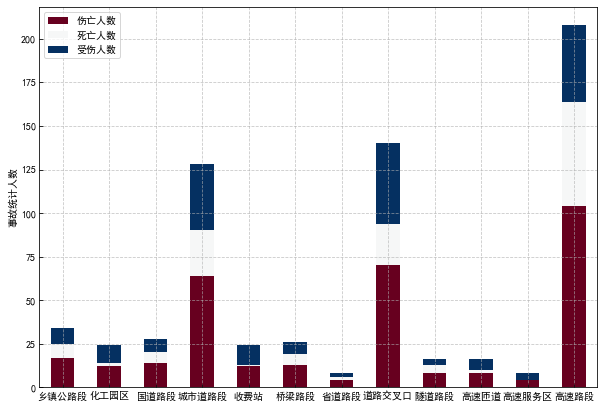

In [22]:
df.T.plot(kind="bar", rot=0,colormap="RdBu",stacked=True,figsize=(10,7))
plt.grid(linestyle = "--",alpha=0.7)
plt.ylabel("事故统计人数")
plt.savefig(r"C:\Users\86177\Desktop\tank\road_classfy\table_1.png",dpi =400)

In [23]:
data_compare = data_load.groupby("路段分类").sum()[["死亡","受伤","伤亡人数"]].sort_values("伤亡人数",ascending = False)
data_compare.index

Index(['高速路段', '道路交叉口', '城市道路段', '乡镇公路段', '国道路段', '桥梁路段', '化工园区', '收费站',
       '隧道路段', '高速匝道', '省道路段', '高速服务区'],
      dtype='object', name='路段分类')

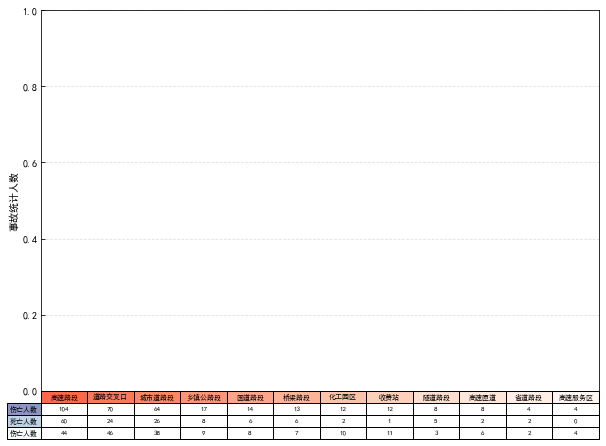

In [24]:
agg = [data_compare["伤亡人数"],
    data_compare["死亡"],
        data_compare["受伤"],
        ]
ls = ['高速路段', '道路交叉口', '城市道路段', '乡镇公路段', '国道路段', '桥梁路段', '化工园区', '收费站',
       '隧道路段', '高速匝道', '省道路段', '高速服务区']
df = pd.DataFrame(agg,columns = ls,
                 index = ["伤亡人数","死亡人数","受伤人数"])


plt.figure(figsize=(10,7))
# 创建堆叠图
plt.table(cellText = agg,
          cellLoc='center',
          cellColours = None,
          rowLabels = ["伤亡人数","死亡人数","伤亡人数"],
          rowColours = plt.cm.BuPu(np.linspace(0, 0.5,3))[::-1],  # BuPu可替换成其他colormap
          colLabels = ls,
          colColours = plt.cm.Reds(np.linspace(0, 0.5,12))[::-1], 
          rowLoc='right',
          loc='bottom',
         )

# cellText：表格文本
# cellLoc：cell内文本对齐位置
# rowLabels：行标签
# colLabels：列标签
# rowLoc：行标签对齐位置
# loc：表格位置 → left，right，top，bottom


plt.xticks([])
# 不显示x轴标注
plt.ylabel("事故统计人数")
plt.grid(linestyle = "--",alpha = 0.4)
plt.savefig(r"C:\Users\86177\Desktop\tank\road_classfy\table_2.png",dpi =400)

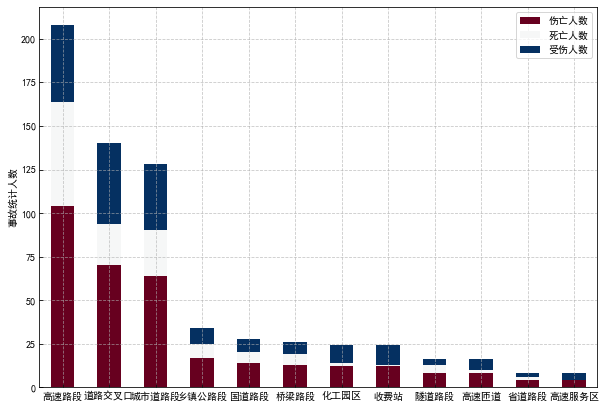

In [25]:
df.T.plot(kind="bar", rot=0,colormap='RdBu',stacked=True,figsize=(10,7))
plt.grid(linestyle = "--",alpha=0.7)
plt.ylabel("事故统计人数")
plt.savefig(r"C:\Users\86177\Desktop\tank\road_classfy\table_3.png",dpi =400)

In [26]:
#介质分类

data_medium = data_load["罐内介质"].value_counts()
num = data_medium.sum()  #总共237起事故 ，去掉水泥19和未知介质，选取次数大于3的介质进行排序
print(num)
data_medium = data_medium.drop("*")
data_medium

#按照化学品和非化学品进行分类

237


水泥       19
甲醇       14
液化天然气    13
浓硫酸      13
汽油       12
         ..
煤渣        1
废水        1
液体碱       1
汽车机油      1
原油        1
Name: 罐内介质, Length: 92, dtype: int64

In [27]:
data_medium["液化天然气"] = 16
data_medium.drop("天然气", inplace = True)
data_medium_2_19 = data_medium[data_medium >2]
data_medium_2_19 = data_medium_2_19.sort_values()

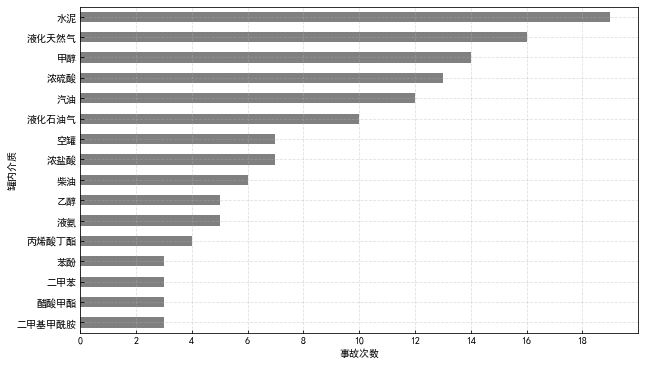

In [28]:
data_medium_2_19.plot(kind = "barh",
                 color = "gray",
                      xlim=(0,20),
                  label = "每月事故数量汇总",
                 figsize = (10,6),
                     )
plt.margins(0.015)
plt.xticks(np.arange(0, 20, step=2))
plt.grid(linestyle = "--",alpha = 0.4)
plt.xlabel("事故次数")
plt.ylabel("罐内介质",labelpad= 0.2)

plt.savefig(r"C:\Users\86177\Desktop\tank\mediums\mediums_1.png",dpi =400)

In [29]:
#事故类型

data_acc_type = data_load["事故类型"]
data_acc_type

0              侧翻
1      冲破护栏、侧翻、泄漏
2              侧翻
3           侧翻，泄漏
4              碰撞
          ...    
232     侧翻，泄漏，着火，
233         追尾，泄漏
234            碰撞
235          轮胎着火
236         碰撞，泄漏
Name: 事故类型, Length: 237, dtype: object

In [30]:
d = {}
for item in data_acc_type:
    if ("，" in  item) or ("、"in item):
        item = item.replace("，"," ")
        item = item.replace("、"," ")   
        #print(item)
        txt_list = item.split(" ")
        for w in txt_list:
            d[w] = d.get(w,0) +1
del d[""]
d

{'冲破护栏': 17,
 '侧翻': 71,
 '泄漏': 115,
 '刹车失灵': 8,
 '轮胎着火': 3,
 '碰撞': 34,
 '着火': 13,
 '爆炸': 11,
 '追尾': 34,
 '剐蹭': 1,
 '自燃': 2,
 '爆燃': 3,
 '燃烧': 2}

In [31]:
#for i,j in zip(d.keys(),d.values()):
    #print(i,j)
acc_type = pd.Series(list(d.values()),index = d.keys())
acc_type.values

array([ 17,  71, 115,   8,   3,  34,  13,  11,  34,   1,   2,   3,   2],
      dtype=int64)

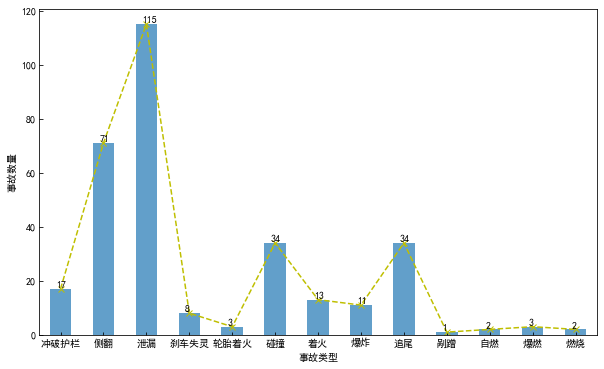

In [32]:
plt.figure(figsize=(10,6))
acc_type.plot(kind = "bar",
             rot =0,
              alpha = 0.7,
             label = "事故类型数量")
plt.xlabel("事故类型")
plt.ylabel("事故数量")
plt.plot(acc_type.index,acc_type.values ,"yx--")

for i, j in zip(range(13), acc_type.values):
    plt.text(i-0.1,j+0.3,"%.0f" %j,fontsize = 10)

In [33]:
#图不好看  换颜色
ls_1 = [ '剐蹭', '自燃', '刹车失灵', '轮胎着火', '冲破护栏',  '碰撞', '侧翻', '泄漏', '追尾','着火', '爆炸', 
       '爆燃', '燃烧']
ls_2 = [  1, 2,   8,   3, 17, 34, 71, 115,  34, 13,  11,   3,   2]
acc_type = pd.Series(ls_2,index = ls_1)
acc_type

剐蹭        1
自燃        2
刹车失灵      8
轮胎着火      3
冲破护栏     17
碰撞       34
侧翻       71
泄漏      115
追尾       34
着火       13
爆炸       11
爆燃        3
燃烧        2
dtype: int64

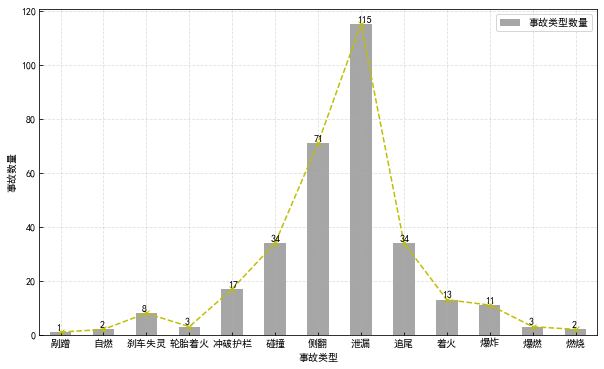

In [34]:
plt.figure(figsize=(10,6))
acc_type.plot(kind = "bar",
             rot =0,
              alpha = 0.7,
              color ="gray",
             label = "事故类型数量")
plt.xlabel("事故类型")
plt.ylabel("事故数量")
plt.legend()
plt.plot(acc_type.index,acc_type.values ,"yx--")
plt.grid(linestyle = "--",alpha =0.4)

for i, j in zip(range(13), acc_type.values):
    plt.text(i-0.1,j+0.5,"%.0f" %j,fontsize = 10)
plt.savefig(r"C:\Users\86177\Desktop\tank\accident_type\acc.png",dpi =400)

In [35]:
#地图数据处理 data_map

data_filter = data_load[["发生时间","日期","地点","区/市","路段分类","罐内介质","事故类型"]]
data_filter.head()

,发生时间,日期,地点,区/市,路段分类,罐内介质,事故类型
0,03:00:00,2019 11.09,江苏,扬州市,城市道路段,石灰粉,侧翻
1,12:00:00,2019 10.10,江苏,泰州市,城市道路段,醋酸乙酯,冲破护栏、侧翻、泄漏
2,17:40:00,2019 10.10,江苏,海安市,高速路段,丙烯腈,侧翻
3,13:40:00,2019 9.10,江苏,淮安市,桥梁路段,柴油,侧翻，泄漏
4,13:00:00,2019 9.07,上海,崇明区,道路交叉口,*,碰撞


In [36]:
#添加事故次数
data = data_filter
data["次数"] = 1
data.head()
#警告是因为版本的问题

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,发生时间,日期,地点,区/市,路段分类,罐内介质,事故类型,次数
0,03:00:00,2019 11.09,江苏,扬州市,城市道路段,石灰粉,侧翻,1
1,12:00:00,2019 10.10,江苏,泰州市,城市道路段,醋酸乙酯,冲破护栏、侧翻、泄漏,1
2,17:40:00,2019 10.10,江苏,海安市,高速路段,丙烯腈,侧翻,1
3,13:40:00,2019 9.10,江苏,淮安市,桥梁路段,柴油,侧翻，泄漏,1
4,13:00:00,2019 9.07,上海,崇明区,道路交叉口,*,碰撞,1


In [37]:
data_map = data[["地点","次数"]].groupby("地点",as_index = False).sum()
data_map

,地点,次数
0,上海,13
1,云南,2
2,内蒙古,1
3,北京,3
4,吉林,1
5,四川,4
6,宁夏,5
7,安徽,11
8,山东,6
9,山西,1


In [38]:
from pyecharts import options as opts
from pyecharts.charts import Map

c = (
    Map().
    add("各区域的事故数量分布",data_map.values.tolist(),"china")
    .set_global_opts(
        title_opts = opts.TitleOpts(title = "各区域的事故数量分布"),
        visualmap_opts = opts.VisualMapOpts(max_ = 50)
    )

)

c.render("C:/Users/86177/Desktop/tank/zone_analysis/2012-2019tank_data.html")

'C:\\Users\\86177\\Desktop\\tank\\zone_analysis\\2012-2019tank_data.html'